### Accuracy of ViTs trained from scratch

In [37]:
import sys, glob
sys.path.append('..')
sys.path.append('../deep-learning-base')
sys.path.append('../deep-learning-base/datasets')
sys.path.append('../deep-learning-base/training')

import torch
from pytorch_lightning import utilities as pl_utils
from pytorch_lightning.trainer.trainer import Trainer
from training import LitProgressBar, NicerModelCheckpointing
import training.finetuning as ft
import architectures as arch
from architectures.callbacks import LightningWrapper, LinearEvalWrapper
from data_modules import DATA_MODULES
import dataset_metadata as dsmd
from partially_inverted_reps import DATA_PATH_IMAGENET, DATA_PATH
from functools import partial
import plot_helper as plt_hp

In [38]:
source_datasets = ['cifar10', 'cifar100']
finetuning_datasets = ['cifar10', 'cifar100']
finetune_mode = 'full'
models = ['vit_base_patch32_224']
BATCH_SIZE = 512

USE_TIMM_FOR_CIFAR = True
SEED = 2
DEVICES = 1
STRATEGY = None
NUM_NODES = 1

In [39]:
trainer = Trainer(accelerator='gpu', 
                  devices=DEVICES,
                  num_nodes=NUM_NODES,
                  strategy=STRATEGY, 
                  log_every_n_steps=1,
                  auto_select_gpus=True, 
                  deterministic=True,
                  num_sanity_val_steps=0,
                  callbacks=[LitProgressBar(['loss', 'running_test_acc'])])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [40]:
model_to_accs = {}
for source_ds, ft_ds in zip(source_datasets, finetuning_datasets):
    dm = DATA_MODULES[ft_ds](
        data_dir=DATA_PATH_IMAGENET if 'imagenet' in ft_ds else DATA_PATH,
        transform_train=dsmd.TRAIN_TRANSFORMS_TRANSFER_DEFAULT(224),
        transform_test=dsmd.TEST_TRANSFORMS_DEFAULT(224),
        batch_size=BATCH_SIZE)
    dm.init_remaining_attrs(source_ds)
    
    for model in models:
        model_paths = glob.glob(f'checkpoints/{model}-base-{source_ds}-ft-{ft_ds}/'
                                f'ftmode-{finetune_mode}-lr-*-steplr-*-bs-*-scratch-*/*-topk=1.ckpt')
        hparams_to_acc = {}
        for path in model_paths:
            hparams_str = path.split('/')[-2].split(f'ftmode-{finetune_mode}-')[1]
            m1 = arch.create_model(model, source_ds, pretrained=True,
                                   checkpoint_path=path, seed=SEED, 
                                   num_classes=dsmd.DATASET_PARAMS[source_ds]['num_classes'],
                                   callback=partial(LightningWrapper,
                                                    dataset_name=source_ds,
                                                    training_params_dataset=ft_ds),
                                   loading_function_kwargs={'strict': False} if '_ff' in model or \
                                       '_mrl' in model else {},
                                   use_timm_for_cifar=USE_TIMM_FOR_CIFAR)
            
            out = trainer.predict(m1, dataloaders=[dm.test_dataloader()])
            hparams_to_acc[hparams_str] = torch.sum(torch.argmax(out[0], 1) == out[1]).item()/len(y)
    
        model_to_accs[f'{model} source {source_ds} finetune {ft_ds}'] = hparams_to_acc

Global seed set to 2
Global seed set to 0
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
Global seed set to 0
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

Global seed set to 2
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: 0it [00:00, ?it/s]

In [41]:
model_to_accs

{'vit_base_patch32_224 source cifar10 finetune cifar10': {'lr-0.1-steplr-500.0-bs-256-scratch-warmup-100': 0.9584,
  'lr-0.01-steplr-500.0-bs-256-scratch-warmup-100': 0.9859,
  'lr-0.001-steplr-500.0-bs-256-scratch-warmup-440': 0.989,
  'lr-0.001-steplr-500.0-bs-256-scratch-warmup-100': 0.9872,
  'lr-0.1-steplr-500.0-bs-128-scratch-warmup-100': 0.938,
  'lr-0.01-steplr-500.0-bs-128-scratch-warmup-880': 0.9792,
  'lr-0.001-steplr-500.0-bs-128-scratch-warmup-880': 0.9893,
  'lr-0.1-steplr-500.0-bs-128-scratch-warmup-880': 0.9423,
  'lr-0.01-steplr-500.0-bs-128-scratch-warmup-100': 0.9729,
  'lr-0.001-steplr-500.0-bs-128-scratch-warmup-100': 0.988},
 'vit_base_patch32_224 source cifar100 finetune cifar100': {'lr-0.01-steplr-500.0-bs-128-scratch-warmup-880': 0.8932,
  'lr-0.01-steplr-500.0-bs-128-scratch-warmup-100': 0.8852,
  'lr-0.001-steplr-500.0-bs-256-scratch-warmup-100': 0.9102,
  'lr-0.001-steplr-500.0-bs-256-scratch-warmup-440': 0.9252,
  'lr-0.1-steplr-500.0-bs-256-scratch-warmup-

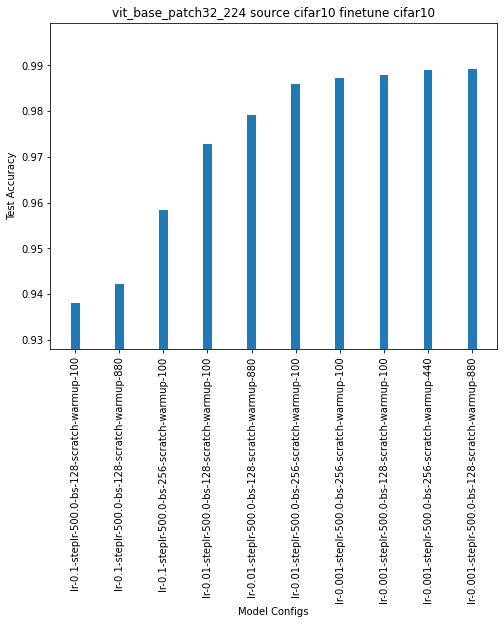

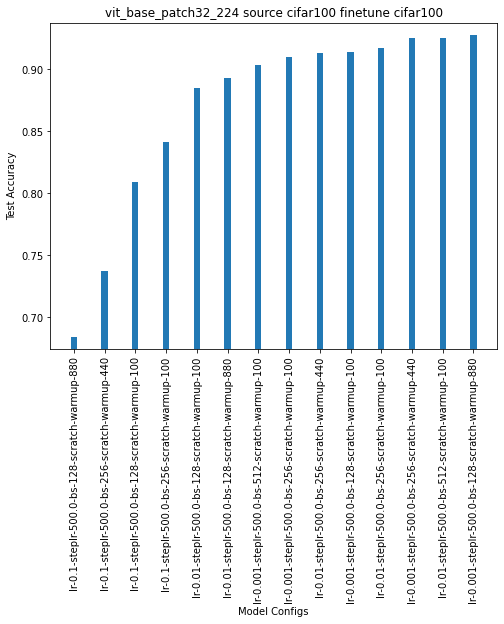

In [42]:
for plot_title, results in model_to_accs.items():
    x_labels, bars = list(zip(*sorted(results.items(), key=lambda x: x[1])))
    plt_hp.bar_plot([bars], 'Model Configs', 'Test Accuracy', plot_title, 
                    subfolder='scratch', x_labels=x_labels, 
                    filename='-'.join(plot_title.split()), 
                    legend_vals=None, savefig=True, show_fig=True, 
                    extension='png', x_tick_colors=None, 
                    horizontal_lines=None, figsize=(8,6), 
                    colors=None, hatchstyles=None,
                    y_lims=None, paper_friendly_plots=False, 
                    results_folder_name='results', 
                    results_subfolder_name='accuracy_analysis', 
                    legend_ncol=None)